### Photon Orbits in Schwarzschild Metric

The Lagrangian is given by :

$$ \mathcal{L}=-k^{-1}c^2E^2+k^{-1}\dot{r}^2+\dfrac{L}{r^2} $$

where, $k =1-\dfrac{r_s}{r}=1-\dfrac{2GM}{rc^2}$, $E = \dot{t}k$ and $L=r^2\dot\phi$

Now use the constraint (for null trajectories), $\mathcal{L}=0$ :

$$ 0=(-c^2E^2+\dot{r}^2)k^{-1}+\dfrac{L^2}{r^2}\implies \dot{r}^2=c^2E^2-k\dfrac{L^2}{r^2}\newline\implies (u')^2L^2=c^2E^2-kL^2u^2\implies c^2E^2=(u')^2L^2+kL^2u^2 $$

Now, we make the change of variable as : $ u(r)= 1/r$. Then, 

$$ \dot{r}=-u'L $$
and $$ \ddot{r}=-L^2u''u^2 $$

Differentiating the Constraint equation above, we get the ODE :

$$0=2u'u''L^2+2kL^2uu'-r_su'L^2u^2\newline\implies 0=u''+(1-r_su)u-\dfrac{r_s}{2L^2}L^2u^2\newline \implies u''+u=r_su^2+\dfrac{r_su^2}{2} \newline \implies u''+u=\dfrac{3GMu^2}{c^2}$$

To solve this ODE numerically, we shall write it as two couples first order ODEs as below :

$$ \dot{u}=v $$
$$ \dot{v}=\dfrac{3GMu^2}{c^2}-u $$

In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
# Defining the physical constants

G = 6.67*10**-11                    # Universal Gravitational constant
M = 2*10**30                        # Mass of Sun
AU = 1.496*10**11                   # Astronomical Unit (A.U.)
c = 299792458                       # Speed of light
r_s = 2*G*M/c**2                    # Schwarzschild radius
L_earth = 4.4536*10**15             # Angular momentum of Earth per unit mass
L_mercury = 2.7701*10**15           # Angular momentum of Mercury per unit mass
merc_per = 0.307499*AU              # Perihelion distance of Mercury
earth_per = 0.9832899*AU            # Perihelion distance of Earth
e_merc = 0.21                       # eccentricity of mercury's orbit (in Newtonian mechanics)
e_earth = 0.017                     # eccentricity of earth's orbit (in Newtonian mechanics)

In [27]:
# Defining the derivative function
# here x = angular position (phi)
# and y = radial position (r)

def ddx(x,y):
    u = y[0]
    v = y[1]
    return np.array([v,3*G*M*u**2/c**2-u])

In [28]:
# Defining RK4 method

def rk4(f,x,y,h):
    k1 = h*f(x,y)
    k2 = h*f(x+h/2,y+k1/2)
    k3 = h*f(x+h/2,y+k2/2)
    k4 = h*f(x+h,y+k3)
    return y+(k1+2*k2+2*k3+k4)/6

In [29]:
# Defining the Caller function

def Caller(mtd,f,xs,y_ini,h):
    N = len(xs)
    y = y_ini
    ys = np.zeros((N,2),float)
    for i in range(N):
        x = xs[i]
        ys[i] = y
        y = mtd(ddx,x,y,h)
    return ys

In [30]:
# Initial Coditions

# For Earth :

r0 = 1.51*r_s                              # Initial Radial Position
u0 = 1/r0
v0 = 0                                          # Initial Radial Velocity
y_ini = np.array([u0,v0])

# Time step

h = 0.001

In [31]:
# Getting a solution

n = 1                                        # Number of full circles

xs = np.arange(0,2*np.pi*n,h)                # Stores the angular coordinates
ys = Caller(rk4,ddx,xs,y_ini,h)              # Stores the radial coordinates and radial velocities

r = 1/ys[:,0]                                  # Stores just the radial coordinates
r = r/(1*AU)                                 # Normalizes the radial distance w.r.t. 1 A.U.

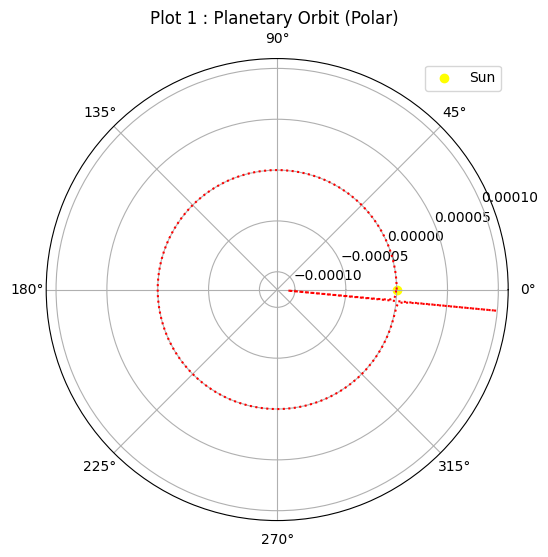

In [32]:
# Visualizing the Polar Plot

plt.figure(figsize=(6,6))
ax = plt.subplot(111, polar = True)
ax.plot(xs,r,linestyle = "dotted",c = "red")
ax.scatter([0],[0],label="Sun",c="Yellow",marker = "o")
plt.title("Plot 1 : Planetary Orbit (Polar) ")
plt.legend()
plt.show()


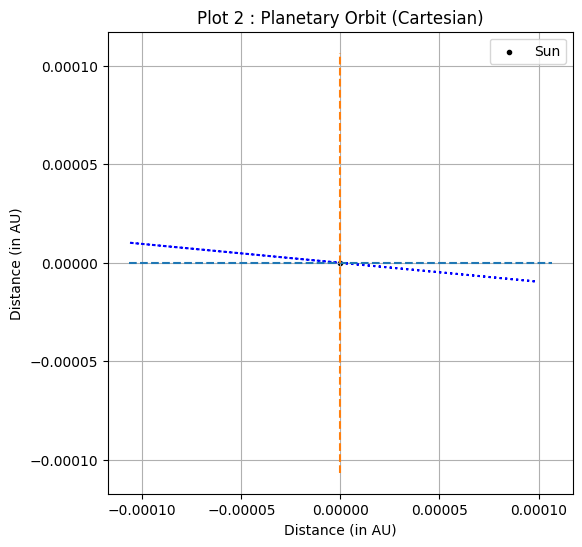

In [33]:
# In Cartesian Coodinates

x_ax = np.zeros((len(r),),float)
y_ax = np.zeros((len(r),),float)

l = 0

for i in range(len(r)):
    x_ax[i]=r[i]*np.cos(xs[i])
    y_ax[i]=r[i]*np.sin(xs[i])
    if l<abs(x_ax[i]):
        l=abs(x_ax[i])
    if l<abs(y_ax[i]):
        l=abs(y_ax[i])


plt.figure(figsize=(6,6))
plt.plot(x_ax,y_ax,c='blue',linestyle = 'dotted')
plt.plot([-l,l],[0,0],linestyle = 'dashed')
plt.plot([0,0],[-l,l],linestyle = 'dashed')
plt.scatter([0],[0],marker='.',c='black',label="Sun")
plt.xlabel("Distance (in AU)")
plt.ylabel("Distance (in AU)")
plt.title("Plot 2 : Planetary Orbit (Cartesian)")
plt.grid()
plt.legend()
plt.show()

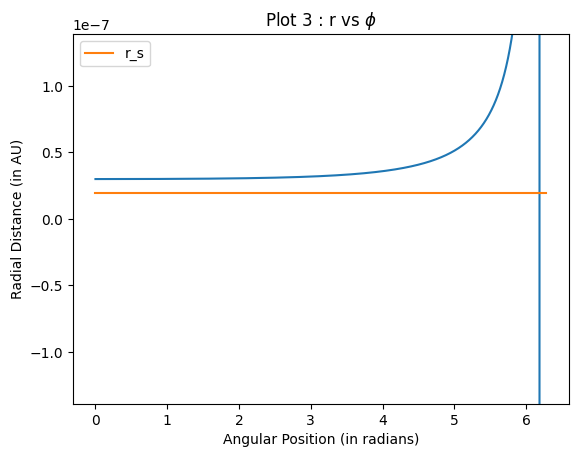

In [34]:
# Radial Distance vs phi plot

plt.plot(xs,r)
plt.plot([0,max(xs)],[r_s/AU,r_s/AU],label = "r_s")
plt.title("Plot 3 : r vs $\phi$")
plt.xlabel("Angular Position (in radians)")
plt.ylabel("Radial Distance (in AU)")
plt.ylim(-r_s*7/AU,r_s*7/AU)
plt.legend()
plt.show()

In [35]:
print(r)

print("Distance of Closest Approach =",AU*min(abs(r)),"km")
print("Schwarzschild Radius, r_s =",r_s)
print(len(r))

if r_s<AU*min(abs(r)):
    print("\n The photon didn't fall in the blackhole.")
else:
    print("\n The photon fell inside the blackhole.")

for i in range(len(r)):
    if abs(r[i])>r[0]:
        print(i)
        print(i*h)
        break

[ 2.99633090e-08  2.99633091e-08  2.99633094e-08 ... -5.52355831e-07
 -5.46527457e-07 -5.40821363e-07]
Distance of Closest Approach = 4482.511027822092 km
Schwarzschild Radius, r_s = 2968.5503495510543
6284

 The photon didn't fall in the blackhole.
1
0.001


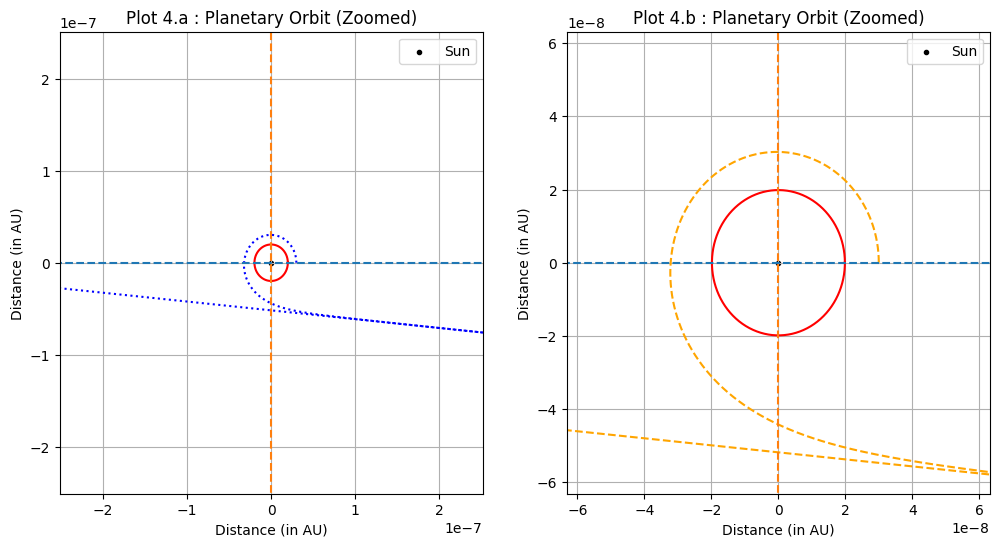

In [36]:
# Finer Picture of the orbit 
# ZOOM IN THE PLOT USING THE PARAMETER 'q'
 
plt.figure(figsize=(12,6))

pps = np.arange(0,2*np.pi+0.01,0.01)
xxs = [r_s/AU*np.cos(i) for i in pps]
yys = [r_s/AU*np.sin(i) for i in pps]

plt.subplot(1,2,1)

q_1 = 6.6                              # Increase this number to zoom into the plot

plt.plot(xxs,yys,c='red')
plt.plot(x_ax,y_ax,c='blue',linestyle = 'dotted')
plt.plot([-l,l],[0,0],linestyle = 'dashed')
plt.plot([0,0],[-l,l],linestyle = 'dashed')
plt.scatter([0],[0],marker='.',c='black',label="Sun")
plt.xlabel("Distance (in AU)")
plt.ylabel("Distance (in AU)")
plt.title("Plot 4.a : Planetary Orbit (Zoomed)")
plt.xlim(-10**-q_1,10**-q_1)
plt.ylim(-10**-q_1,10**-q_1)
plt.grid()
plt.legend()

plt.subplot(1,2,2)

q_2 = 7.2                               # Increase this number to zoom into the plot

plt.plot(xxs,yys,c='red')
plt.plot(x_ax,y_ax,c='orange',linestyle = 'dashed')
plt.plot([-l,l],[0,0],linestyle = 'dashed')
plt.plot([0,0],[-l,l],linestyle = 'dashed')
plt.scatter([0],[0],marker='.',c='black',label="Sun")
plt.xlabel("Distance (in AU)")
plt.ylabel("Distance (in AU)")
plt.title("Plot 4.b : Planetary Orbit (Zoomed)")
plt.xlim(-10**-q_2,10**-q_2)
plt.ylim(-10**-q_2,10**-q_2)
plt.grid()
plt.legend()

plt.show()

### Some Parameters Worth Mentioning : 

1. $q_i$ [ Zoom Parameter ] : Use them to zoom into the particle orbit and get a clearer picture of what's going on. You might need to know the minimum value of radial distance to get an idea of how much you should be zooming in.
2. $n$ : Increasing this parameter shows further trajectory of the particle.